# Initial Setup

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


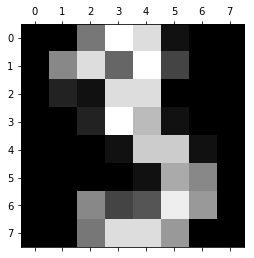

In [12]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[3]) 
plt.show() 

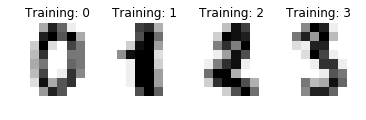

In [13]:
images_and_labels = list(zip(digits.images, digits.target))


for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

plt.show()

In [19]:
# flatten the image.
# turn the data into a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [27]:
# make the predictor matrix and label vector
X = digits.data
Y = digits.target
# split the data for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

# Build and Test Model

In [28]:
# create logistic regression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# test values
y_predicted = logreg.predict(X_test)
# print confusion matrix
confusion = confusion_matrix(y_test, y_predicted)
print('Confusion matrix')
print(confusion)

Confusion matrix
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]


In [30]:
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       1.00      0.97      0.99        35
          2       1.00      0.97      0.99        36
          3       0.95      0.95      0.95        41
          4       0.97      1.00      0.99        38
          5       0.94      0.97      0.95        30
          6       1.00      1.00      1.00        37
          7       1.00      0.97      0.99        37
          8       0.90      0.93      0.92        29
          9       0.91      0.94      0.93        34

avg / total       0.97      0.97      0.97       360



# Questions
### Which digits are most often confused by the model?
By looking at the confusion matrix, we can see that relatively few of the digits were confused. Of 360 pictures:
* one 0 was mistaken for a 4
* one 1 was mistaken for an 8
* one 2 was mistaken for a 3
* one 3 was mistaken for an 8, and one 3 was mistaken for a 9
* no 4's were mistaken for any other digit
* one 5 was mistaken for a 3
* no 6's were mistaken for any other digit
* one 7 was mistaken for a 9
* one 8 was mistaken for a 5, and one 8 was mistaken for a 9
* one 9 was mistaken for a 5, and one 9 was mistaken for an 8

Overall, 3, 5, 8, and 9 were mixed up more than any other digits; that is, they were most often incorrectly identified by the model or failed to be identified by the model (we can also see in the classification report that they have the lowest precision, recall, and f1-scores). The model confused 8 and 9 for each other more often than any other combination of digits, which was still relatively rare.


### What is the accuracy of the model?
The accuracy of the model (correct classification/total number of values) is 97% (see calculation below)

In [38]:
correct = 42+34+35+39+38+29+37+36+27+32
accuracy = round(correct/360.0,2)
accuracy

0.97

### Which digits are most often recognized correctly?
In the classification report, the precision value represents the ability of the classifier not to label a value as positive if it is negative. The recall represents the ability of the classifier to label all positive values as positive.

The digits with the highest recall were 6 and 4; no pictures that actually represented a 6 or a 4 were mistaken for another digit. There was one instance where the classifier incorrectly identified a 0 as a 4, but no instances where the classifier identified another digit as a 6.

Overall, the model's ability to correctly identify 6's (and not identify non-6's as 6's) is slightly better than its judgment for 4's.


### Which are recognized incorrectly?
The digit with the lowest precision was 8, closely followed by 9. 27 eights were correctly identified as 8, but one 1, one 3, and one 9 were also identified as 8. 32 nines were correctly identified as 9, but one 3, one 7, and one 8 were also identified as 9. All other digits had fewer than three false positives.

9 and 8 also had the lowest recall.

### JD-comment

Excellent.